# Train Model

In [1]:
from comet_ml import Experiment
from pytorch_lightning.loggers import CometLogger
import datasets
import torch
from architectures import *
from torch.utils.data import Dataset, DataLoader
import pytorch_lightning as pl
import torchvision
from pytorch_lightning.loggers import MLFlowLogger

%config Completer.use_jedi = False

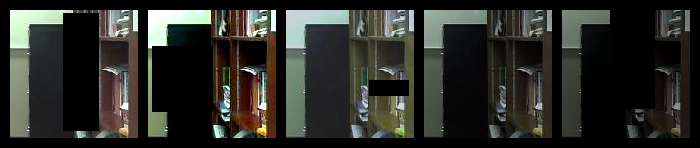

In [2]:
root = "dataset2014/dataset/baseline/office/groundtruth/"
dataset = datasets.ImageData("dataset2014/dataset/baseline/office/input/")
show = transforms.ToPILImage()

x,y  = dataset[55]

show = transforms.ToPILImage()
showSeq = lambda xs: [show(x.squeeze(0)) for x in torch.split(xs,1)]
showSeq(x)
grid = torchvision.utils.make_grid(x, nrow=10, padding=10)
show(grid)

In [3]:
#mlf_logger = MLFlowLogger(
#    experiment_name="default",
#    tracking_uri="file:./ml-runs"
#)

comet_logger = CometLogger(
    api_key="tMEjeyq5M7v1IPRCvS5fyGyuo",
    workspace="semjon", # Optional
    project_name="general" # Optional
    # rest_api_key=os.environ["COMET_REST_KEY"], # Optional
    # experiment_name="default" # Optional
)

train_loader = DataLoader(dataset)
net = DeepAggNet(planes=16,agg_block=AttentionAggregation)
trainer = pl.Trainer(gpus=1,logger=comet_logger)
trainer.fit(net, train_loader)

CometLogger will be initialized in online mode
GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/semjon/general/b96a8969006b45478694dd35553633ff


  | Name       | Type                 | Params
----------------------------------------------------
0 | input      | Conv2d               | 448   
1 | output     | Conv2d               | 435   
2 | downsample | Sequential           | 23.1 K
3 | upsample   | Sequential           | 23.1 K
4 | encoder    | Sequential           | 738 K 
5 | agg        | AttentionAggregation | 25.2 K
6 | decoder    | Sequential           | 738 K 
7 | smooth     | Sequential           | 32.5 K
----------------------------------------------------
1.6 M     Trainable params
0         Non-trainable params
1.6 M     Total params


Epoch 0:  97%|█████████████████████████████████████████▋ | 1990/2050 [02:49<00:05, 11.76it/s, loss=0.00946, v_num=33ff]

c:\users\simon\anaconda3\envs\dl\lib\site-packages\pytorch_lightning\utilities\distributed.py:49: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  warnings.warn(*args, **kwargs)
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/semjon/general/b96a8969006b45478694dd35553633ff
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     loss [199]      : (0.005465499125421047, 0.24021920561790466)
COMET INFO:     train_loss [39] : (0.008276103995740414, 0.1708870381116867)
COMET INFO:   Uploads:
COMET INFO:     code                     : 1 (1 KB)
COMET INFO:     environment details      : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (286 KB)
COMET INFO:     installed packages       : 1

COMET INFO: Uploading stats to Comet before program termination (may take several seconds)
COMET INFO: Waiting for completion of the file uploads (may take several seconds)
COMET INFO: Still uploading


1

In [ ]:
import torchvision

dataset = torchvision.datasets.ImageFolder("dataset2014/dataset/baseline/highway/")
x,y = dataset[2001]
X = []

# Test whether aggregation moduls have correct dimensionality:
$ f : \mathcal{P}\left( \mathbb{R}^{(B \times C \times H \times W)} \right) \rightarrow \mathbb{R}^{(B \times C \times H \times W)} $ 

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from architectures import *
from torch.utils.tensorboard import SummaryWriter
%config Completer.use_jedi = False

In [ ]:
S,B,C,H,W = 4, 5, 64, 256, 256    # Sequence length, Batch size, Channels, Height, Width
x = torch.rand(B, S, 3, H, W)
net = DeepAggNet(planes=16,agg_block=AttentionAggregation)
#net = DeepAggNet()
net(x).size()